# NLP - Sentiment Analysis for Amazon Product Reviews
# Exploratory Data Analysis

This is the 3rd phase of the project - exploring the preprocessed results from Amazon's review section, hence, we'll read the 'Whey_Protein_Amazon_Preprocessed_Reviews.csv' file. In this notebook we'll show the following:
1. Basic statistics of our results grouped by product name per product id
2. Horizontal bar chart is provided to reflect the total count of reviews for each product name per product id
3. Vertical bar chart for every star (1-5) given to for all the whey protein products currently at Amazon

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re

# To set gray background at graphs
plt.style.use('ggplot')

In [2]:
# Read scraped results from CSV
df = pd.read_csv('Whey_Protein_Amazon_Preprocessed_Reviews.csv')

### Basic statistics of our results grouped by product name per product id

In [3]:
df.groupby(["Product_Name", "Product_ID"])["Rating_Score"].describe()

,,count,mean,std,min,25%,50%,75%,max
Product_Name,Product_ID,,,,,,,,
Ascent-Native-Fuel-Protein-Powder,B01N7VLTW3,99.0,4.707071,0.688870,2.0,5.00,5.0,5.0,5.0
BSN-SYNTHA-6-Protein-Micellar-Servings,B002DYJ1C4,100.0,4.730000,0.565953,1.0,5.00,5.0,5.0,5.0
Body-Fortress-Advanced-Chocolate-Vitamins,B0BJLBD427,100.0,4.410000,0.652811,3.0,4.00,4.5,5.0,5.0
Body-Fortress-Advanced-Protein-Chocolate,B010OVRDM2,99.0,4.393939,0.793059,1.0,4.00,5.0,5.0,5.0
Dymatize-Hydrolyzed-Absorbing-Digesting-Servings,B099J2SWXV,98.0,4.714286,0.454077,4.0,4.00,5.0,5.0,5.0
Dymatize-L-Leucine-Absorbing-Digesting-Recovery,B00EACSHF4,98.0,4.653061,0.761199,2.0,5.00,5.0,5.0,5.0
Dymatize-Protein-Isolate-Gourmet-Chocolate,B002N6F2UW,99.0,4.555556,0.703087,2.0,4.00,5.0,5.0,5.0
Garden-Life-Protein-Powder-Sweetened,B074JKZXLB,97.0,4.288660,1.079726,1.0,4.00,5.0,5.0,5.0
Isopure-Protein-Friendly-Unflavored-Packaging,B002TG3QPO,100.0,4.420000,0.698917,3.0,4.00,5.0,5.0,5.0


### Horizontal bar chart is provided to reflect the total count of reviews for each product name per product id

Text(0, 0.5, 'Whey Protein Powder Product per Product ID')

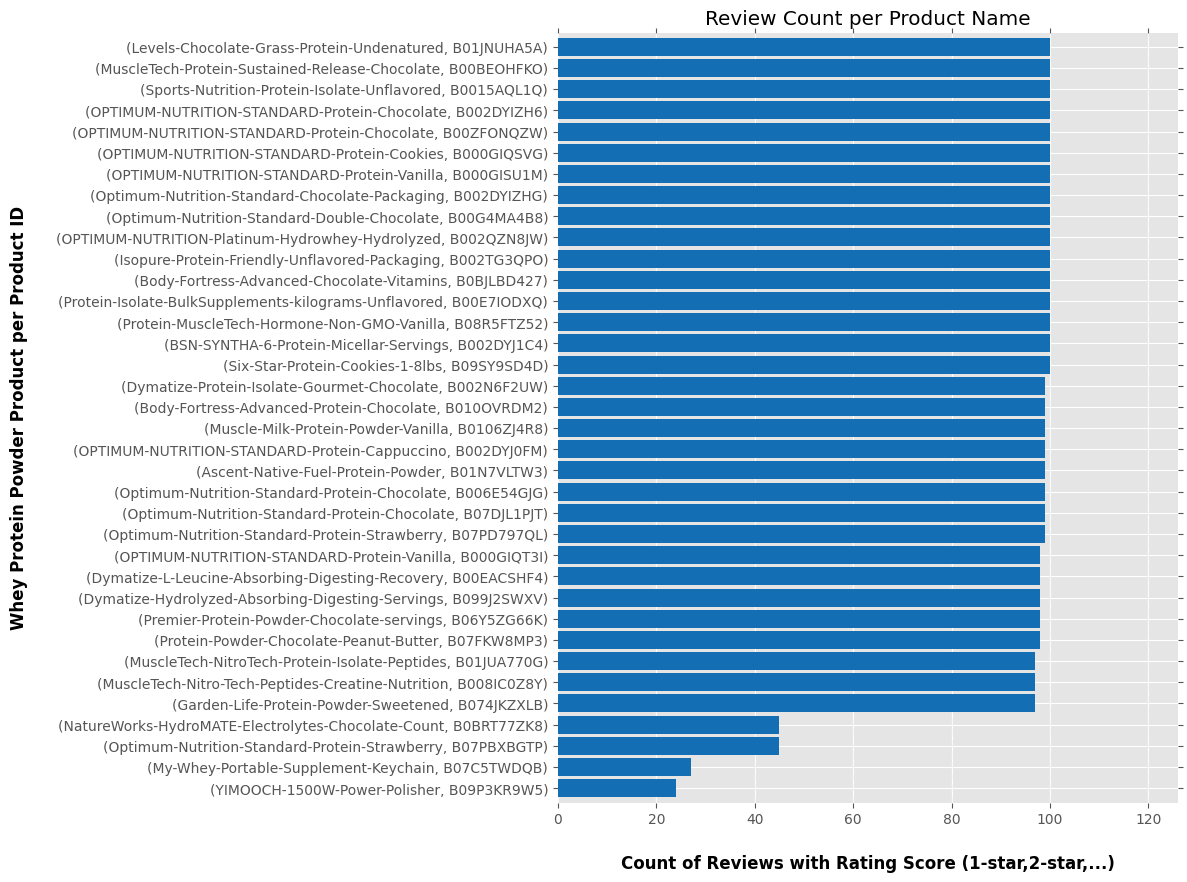

In [11]:
# Set up visualization
x = df.groupby(['Product_Name', 'Product_ID'])['Rating_Score'].count().sort_values()
ax = x.plot(kind = 'barh', \
            title = 'Review Count per Product Name', \
            figsize = (8, 10), \
            color = '#146eb4', \
            zorder = 2, 
            width = 0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis = "both", \
               which = "both", \
               bottom = "off", \
               top = "off", \
               labelbottom = "on", \
               left = "off", \
               right = "off", \
               labelleft = "on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x = tick, \
               linestyle = 'dashed', \
               alpha = 0.4, \
               color = '#eeeeee', \
               zorder = 1)

# Set x-axis label
ax.set_xlabel("Count of Reviews with Rating Score (1-star,2-star,...)", \
              labelpad = 20, \
              weight = 'bold', \
              size = 12)

# Set y-axis label
ax.set_ylabel("Whey Protein Powder Product per Product ID", \
              labelpad = 20, \
              weight = 'bold', \
              size = 12)

# Note that not every product will meet the 100-comment threshold, as some products have less reviews 

### Vertical bar chart for every star (1-5) given to for all the whey protein products currently at Amazon

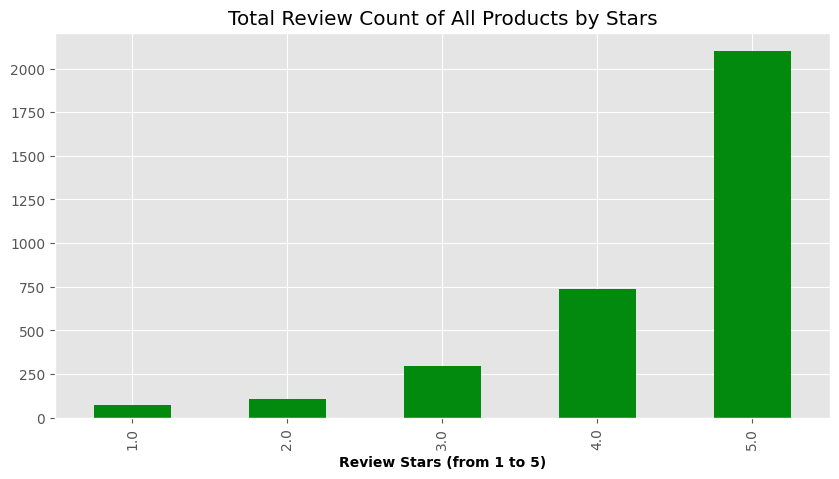

Rating_Score
1.0      74
2.0     108
3.0     294
4.0     738
5.0    2100
dtype: int64


In [13]:
# Set up visualization
ax = df['Rating_Score'].value_counts().sort_index() \
    .plot(kind = 'bar',
          color = '#028A0F',
          title = 'Total Review Count of All Products by Stars',
          figsize = (10, 5))
ax.set_xlabel('Review Stars (from 1 to 5)', weight = 'bold')
plt.show()

rating_counts = df.groupby(['Rating_Score']).size()
print(rating_counts)

## EDA Conclusion - all customer reviews/comments are biased towards the 'positive' results, which means that our analysis suggest that the overall quality of all the whey protein products available for sell at Amazon is high. Our sentiment analysis models should reflect positive 'feelings' towards these products.